In [2]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bc_power import utils

In [3]:
config_file = r"/home/pmcwhannel/repos/PyPSA_BC/config/config.yaml"
cfg = utils.load_config(config_file)
network_path = "/home/pmcwhannel/repos/PyPSA_BC/results/network_debug.nc" # cfg['pypsa']['results']

n = pypsa.Network(override_component_attrs=utils.get_multi_link_override())
pypsa.Network.import_from_netcdf(network=n, path=network_path)

INFO:pypsa.io:Imported network network_debug.nc has buses, carriers, generators, lines, line_types, links, loads, stores, transformer_types


In [ ]:
ror_fpath = "/mnt/c/Users/pmcw9/Delta-E/PICS/PyPSA_BC/results/interim/bc_ror_power_series.csv"
ror_df = pd.read_csv(ror_fpath,index_col=0)
ror_df.index = pd.to_datetime(ror_df.index)

In [8]:
ror_df = n.generators_t
temp = .groupby([ror_df.index.to_series().dt.month]).sum() 

In [28]:
ror_names = n.generators.index[n.generators.index.str.contains("RoR Generator")]
agg_ror = pd.Series([0]*len(n.snapshots),index=n.snapshots)

for ror in ror_names:
    agg_ror += n.generators_t.p_max_pu[ror] * n.generators.loc[ror,"p_nom"]

<AxesSubplot:xlabel='snapshot'>

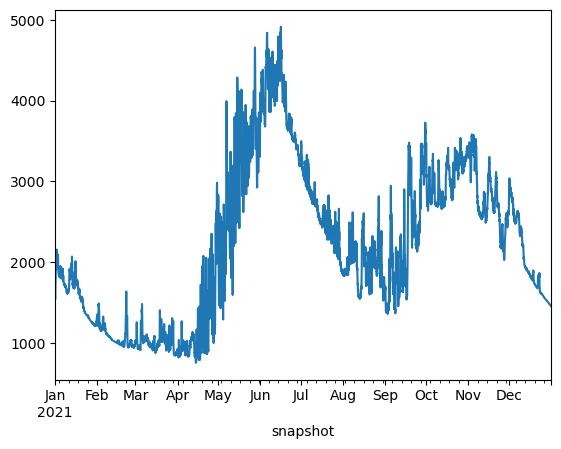

In [32]:
agg_ror.plot()